In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from sklearn.datasets import load_digits

# from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

import os

In [2]:
file_dir = os.chdir(r'C:\Users\johnh\Dropbox\Edureka\machine_learning_certification\Class5')

_**Case Study**_

_Domain – Health Care_

focus – Cancer detection

_**Business challenge/requirement**_

John Cancer Hospital (JCH) is a leading cancer hospital in USA. It specializes in preventing breast cancer.
Over the period of the last few years, JCH has collected breast cancer data from patients who came for screening/treatment.
However, this data has almost 30 attributes and is difficult to run and interpret the result. You as ML expert has to reduce the no. of attributes (Dimensionality Reduction) so that results are meaningful and accurate.

_**Key issues**_

Reduce the no. of attributes/features in data to make the results and analysis comprehensible by doctors

_**Data volume**_

- Approx 569 records – file breast-cancer-data.csv

Fields in Data

* Details in Module8-Dimensionality-Reduction-PCA.ipynb notebook

## Load data and check for data completeness

In [3]:
df = pd.read_csv('breast-cancer-data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

## Define target variable and features to drop

The feature id is not intended to have explanatory value. I am dropping it.

In [6]:
df.drop(columns = ['id'], inplace = True)

The target variable of this data seems to be "diagnosis"

In [7]:
diagnostics = df['diagnosis'].value_counts().reset_index()
diagnostics.columns = ['diagnosis', 'count']
diagnostics['percentage'] = diagnostics['count'] / diagnostics['count'].sum()
diagnostics

,diagnosis,count,percentage
0,B,357,0.627417
1,M,212,0.372583


''

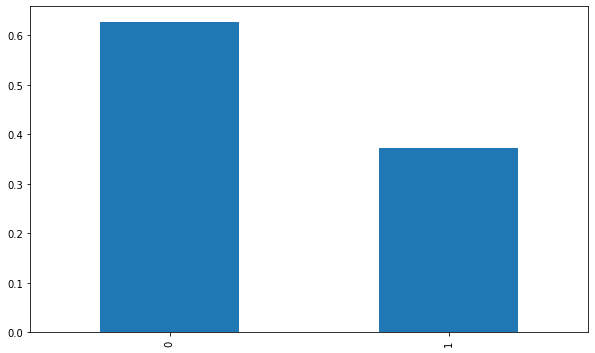

In [8]:
fig, ax = plt.subplots(figsize = (10, 6))
ax = diagnostics['percentage'].plot(kind= 'bar')
;

In [9]:
labelencoder = LabelEncoder()
df['diagnosis'] = labelencoder.fit_transform(df['diagnosis'])

In [10]:
# Check whether the encoding work or not
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Set Baseline ML

The goal of this part is to determine the accuracy from which we need to improve upon.

In [11]:
y = df['diagnosis']
X = df.drop(columns = ['diagnosis'])

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =  0.2, random_state = 85)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(455, 30)
(114, 30)
(455,)
(114,)


In [13]:
lr = LogisticRegression(solver='lbfgs', max_iter = 2000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [14]:
predictions = lr.predict(X_test)

In [15]:
acc = accuracy_score(y_test, predictions)
print("Model accuracy is: ", "{:.2%}".format(acc))

Model accuracy is:  92.98%


*Let's apply PCA and LDA to this dataset.  Then see which one is better*

## PCA

PCA goal is to reduce the explanatory features based on by maximizing variability

In [16]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [17]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [18]:
pc_values = np.arange(pca.n_components_) + 1

In [19]:
len(pc_values)

30

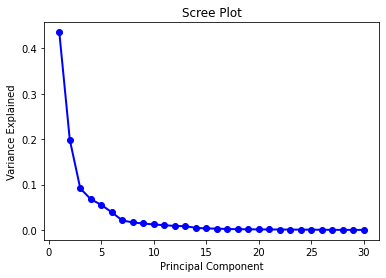

In [20]:
plt.plot(pc_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

Text(0.5, 1.0, 'Explained Variance')

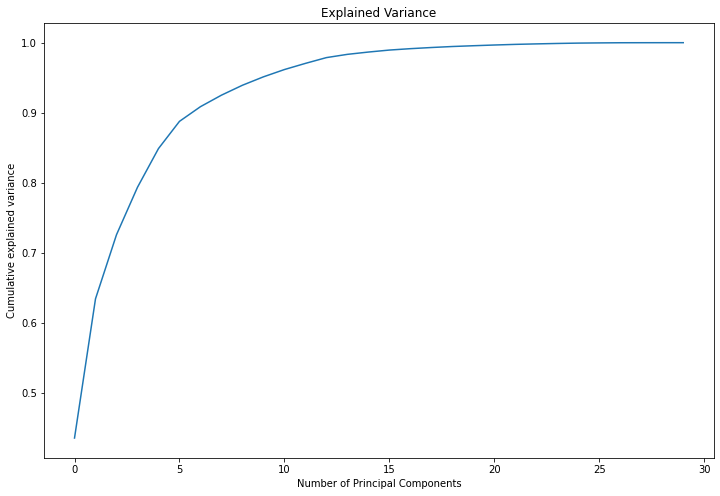

In [21]:
fig, ax = plt.subplots(figsize= (12,8))

ax.plot(np.cumsum(pca.explained_variance_ratio_))
# ax.hlines(y = 0.9520017041454867, xmin= 0, xmax= len(pca.explained_variance_ratio_), linewidth=2, color='r', linestyle = '--')
# ax.vlines(x = 40, ymin= 0, ymax= 1, linewidth=2, color='r', linestyle = '--')
ax.set_xlabel('Number of Principal Components')
ax.set_ylabel('Cumulative explained variance')
ax.set_title('Explained Variance')


In [22]:
pca = PCA(0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [23]:
pca.n_components_

10

In [24]:
pca.explained_variance_ratio_

array([0.43575033, 0.19869882, 0.0914556 , 0.06771951, 0.05524875,
       0.03884007, 0.02096093, 0.01642614, 0.01416359, 0.01199875])

In [25]:
print('Percentage explained with {} principal components: '.format(pca.n_components_), "{:.2%}".format(sum(pca.explained_variance_ratio_)))

Percentage explained with 10 principal components:  95.13%


In [26]:
lr = LogisticRegression(solver='lbfgs', max_iter = 2000)
lr.fit(X_train_pca, y_train)

LogisticRegression(max_iter=2000)

In [27]:
predictions_new = lr.predict(X_test_pca)

In [28]:
acc_new = accuracy_score(y_test, predictions_new)

In [29]:
print("Model accuracy is: ", "{:.2%}".format(acc_new))

Model accuracy is:  95.61%


In [30]:
conf_matrix = confusion_matrix(y_test, predictions_new)
conf_matrix

array([[70,  0],
       [ 5, 39]], dtype=int64)

In [31]:
print('Micro Precision: {:.2%}'.format(precision_score(y_test, predictions_new, average='micro')))
print('Micro Recall: {:.2%}'.format(recall_score(y_test, predictions_new, average='micro')))
print('Micro F1-score: {:.2%}\n'.format(f1_score(y_test, predictions_new, average='micro')))

print('Macro Precision: {:.2%}'.format(precision_score(y_test, predictions_new, average='macro')))
print('Macro Recall: {:.2%}'.format(recall_score(y_test, predictions_new, average='macro')))
print('Macro F1-score: {:.2%}\n'.format(f1_score(y_test, predictions_new, average='macro')))

print('Weighted Precision: {:.2%}'.format(precision_score(y_test, predictions_new, average='weighted')))
print('Weighted Recall: {:.2%}'.format(recall_score(y_test, predictions_new, average='weighted')))
print('Weighted F1-score: {:.2%}'.format(f1_score(y_test, predictions_new, average='weighted')))

Micro Precision: 95.61%
Micro Recall: 95.61%
Micro F1-score: 95.61%

Macro Precision: 96.67%
Macro Recall: 94.32%
Macro F1-score: 95.26%

Weighted Precision: 95.91%
Weighted Recall: 95.61%
Weighted F1-score: 95.56%


In [32]:
class_rep = classification_report(y_test, predictions_new, output_dict= True)
                                
classification_report_ = pd.DataFrame(class_rep).T

classification_report_

,precision,recall,f1-score,support
0,0.933333,1.000000,0.965517,70.00000
1,1.000000,0.886364,0.939759,44.00000
accuracy,0.956140,0.956140,0.956140,0.95614
macro avg,0.966667,0.943182,0.952638,114.00000
weighted avg,0.959064,0.956140,0.955575,114.00000


In [33]:
comparison_df = pd.DataFrame({'original_value': y_test, 'predicted_value': predictions_new})
comparison_df['match'] = comparison_df['original_value'] == comparison_df['predicted_value'] 
comparison_df.head()

,original_value,predicted_value,match
534,0,0,True
521,1,1,True
288,0,0,True
483,0,0,True
386,0,0,True


In [34]:
comparison_df.shape

(114, 3)

In [35]:
wrong_preds = comparison_df.loc[comparison_df['match'] == False]
print(wrong_preds.shape)
display(wrong_preds)

(5, 3)


,original_value,predicted_value,match
91,1,0,False
213,1,0,False
73,1,0,False
13,1,0,False
146,1,0,False


## LDA

LDA is intended to reduce the number of features by minimizing variation and maximizing the distance among means.  The goal is to increase separability

In [36]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [37]:
lda = LDA(solver = 'svd', n_components = None)
X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_test_lda = lda.transform(X_test_scaled)

In [38]:
lda.explained_variance_ratio_

array([1.])

In [39]:
var_ratios = lda.explained_variance_ratio_

In [40]:
lr = LogisticRegression(solver='lbfgs', max_iter = 2000)
lr.fit(X_train_lda, y_train)

LogisticRegression(max_iter=2000)

In [41]:
predictions_new = lr.predict(X_test_lda)

In [42]:
acc_new = accuracy_score(y_test, predictions_new)

In [43]:
print("Model accuracy is: ", "{:.2%}".format(acc_new))

Model accuracy is:  96.49%


In [44]:
conf_matrix = confusion_matrix(y_test, predictions_new)
conf_matrix

array([[70,  0],
       [ 4, 40]], dtype=int64)

In [45]:
print('Micro Precision: {:.2%}'.format(precision_score(y_test, predictions_new, average='micro')))
print('Micro Recall: {:.2%}'.format(recall_score(y_test, predictions_new, average='micro')))
print('Micro F1-score: {:.2%}\n'.format(f1_score(y_test, predictions_new, average='micro')))

print('Macro Precision: {:.2%}'.format(precision_score(y_test, predictions_new, average='macro')))
print('Macro Recall: {:.2%}'.format(recall_score(y_test, predictions_new, average='macro')))
print('Macro F1-score: {:.2%}\n'.format(f1_score(y_test, predictions_new, average='macro')))

print('Weighted Precision: {:.2%}'.format(precision_score(y_test, predictions_new, average='weighted')))
print('Weighted Recall: {:.2%}'.format(recall_score(y_test, predictions_new, average='weighted')))
print('Weighted F1-score: {:.2%}'.format(f1_score(y_test, predictions_new, average='weighted')))

Micro Precision: 96.49%
Micro Recall: 96.49%
Micro F1-score: 96.49%

Macro Precision: 97.30%
Macro Recall: 95.45%
Macro F1-score: 96.23%

Weighted Precision: 96.68%
Weighted Recall: 96.49%
Weighted F1-score: 96.46%


In [46]:
class_rep = classification_report(y_test, predictions_new, output_dict= True)
                                
classification_report_ = pd.DataFrame(class_rep).T

classification_report_

,precision,recall,f1-score,support
0,0.945946,1.000000,0.972222,70.000000
1,1.000000,0.909091,0.952381,44.000000
accuracy,0.964912,0.964912,0.964912,0.964912
macro avg,0.972973,0.954545,0.962302,114.000000
weighted avg,0.966809,0.964912,0.964564,114.000000


In [47]:
comparison_df = pd.DataFrame({'original_value': y_test, 'predicted_value': predictions_new})
comparison_df['match'] = comparison_df['original_value'] == comparison_df['predicted_value'] 
comparison_df

,original_value,predicted_value,match
534,0,0,True
521,1,1,True
288,0,0,True
483,0,0,True
386,0,0,True
...,...,...,...
95,1,1,True
316,0,0,True
15,1,1,True
284,0,0,True


In [48]:
wrong_preds = comparison_df.loc[comparison_df['match'] == False]
print(wrong_preds.shape)
display(wrong_preds)

(4, 3)


,original_value,predicted_value,match
514,1,0,False
73,1,0,False
13,1,0,False
41,1,0,False


## Which one is better?

LDA seems a better option as it takes less features and has a higher level of accuracy (96.49%).  PCA is also good as improve the baseline regression with only 10 features.  The accuracy of our PCA approach is (95.61%).